# Project: Artificial Neural Network (ANN)
## Name: Hoang Anh (Benjamin) Nguyen
This Jupyter Notebook Starter File provides a basic outline for your solutions. For detailed instructions, please refer to the assignment on Canvas. Complete all your work for this project in this same Jupyter Notebook file, which you will submit:
- Code:
  - Insert your code where you see #Insert Code Here.
  - Ensure all code is well-commented and easy to understand.
  - Use clear and descriptive variable names.
- Questions:
  - You will be provided guided questions in a separate assignment vs. here in the code to give you the opportunity to demonstrate a deep understanding of the concepts through thorough explanations and critical thinking.

In [ ]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Some recommended libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import keras_tuner as kt
import itertools




# Part 1: CIFAR-10 Dataset - Image Based

# The Dataset

In [36]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Data Preprocessing

In [37]:

#Insert Code Here
print("Max pixel value (before):", X_train.max())
print("Min pixel value (before):", X_train.min())

Max pixel value (before): 255
Min pixel value (before): 0


In [38]:
# Since this is a bit new, leaving in for some starter code :)
# Normalize the images to a range of 0 to 1
X_train = X_train.astype('float32') / X_train.max()
X_test = X_test.astype('float32') / X_test.max()

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 10)


# Building the ANN Model

In [4]:
tf.debugging.set_log_device_placement(False)   # stop per-op device logs


In [19]:
print("Original labels shape:", y_train.shape)
print("First 5 labels (raw):", y_train[:5].ravel())

Original labels shape: (50000, 10)
First 5 labels (raw): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0.]


The training data is already one-hot encoded.

In [20]:
print("Training data shape:", X_train.shape)
print("One sample shape:", X_train[0].shape)


Training data shape: (50000, 32, 32, 3)
One sample shape: (32, 32, 3)


In [8]:
num_classes = 10
input_shape = (32, 32, 3)   # Input Layer
model = models.Sequential([
    layers.Input(shape=input_shape),

    # Hidden layers (feature extractors)
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,116,970 (4.26 MB)

 Trainable params: 1,116,970 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/10
625/625 - 13s - 20ms/step - accuracy: 0.3922 - loss: 1.6663 - val_accuracy: 0.5550 - val_loss: 1.2466
Epoch 2/10
625/625 - 2s - 4ms/step - accuracy: 0.5527 - loss: 1.2457 - val_accuracy: 0.6339 - val_loss: 1.0301
Epoch 3/10
625/625 - 2s - 4ms/step - accuracy: 0.6133 - loss: 1.0835 - val_accuracy: 0.6777 - val_loss: 0.9110
Epoch 4/10
625/625 - 2s - 4ms/step - accuracy: 0.6569 - loss: 0.9745 - val_accuracy: 0.7083 - val_loss: 0.8262
Epoch 5/10
625/625 - 2s - 3ms/step - accuracy: 0.6836 - loss: 0.8962 - val_accuracy: 0.7227 - val_loss: 0.7895
Epoch 6/10
625/625 - 2s - 3ms/step - accuracy: 0.7066 - loss: 0.8371 - val_accuracy: 0.7370 - val_loss: 0.7491
Epoch 7/10
625/625 - 2s - 3ms/step - accuracy: 0.7223 - loss: 0.7908 - val_accuracy: 0.7370 - val_loss: 0.7471
Epoch 8/10
625/625 - 2s - 3ms/step - accuracy: 0.7359 - loss: 0.7448 - val_accuracy: 0.7312 - val_loss: 0.7654
Epoch 9/10
625/625 - 2s - 4ms/step - accuracy: 0.7477 - loss: 0.7157 - val_accuracy: 0.7584 - val_loss: 0.6949

# Evaluating the Model

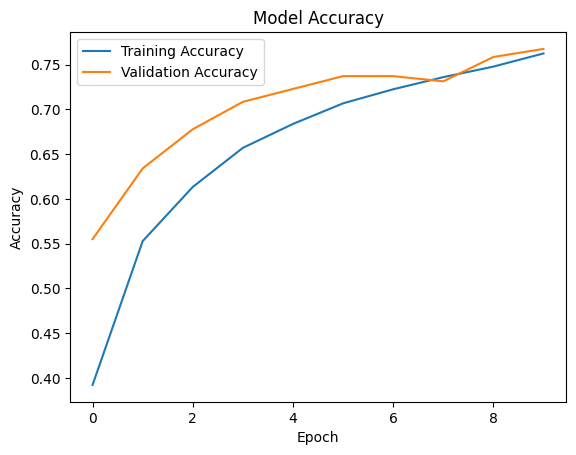

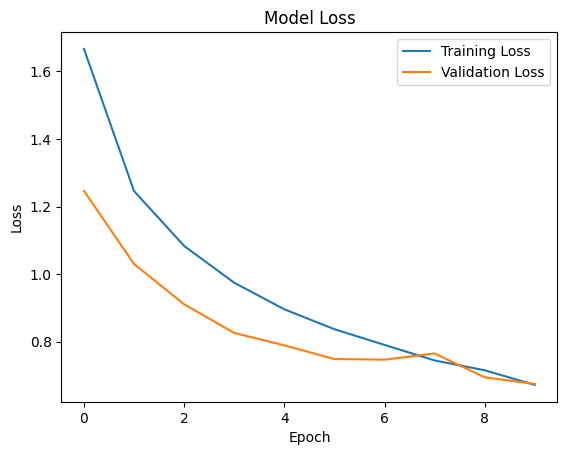

In [35]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## For the Model Selection Project, you will STOP HERE!
During Units 4, 5, and 6, we will explore and learn additional techniques, and then revisit these projects to apply the below:
- Model evaluation and parameter tuning
- Explanatory visualizations and package your results with data storytelling

# Tuning Model Parameters (Completed in Unit 4)

In [ ]:
#Insert Code Here


def build_model(hp: kt.HyperParameters):
    # Tunables
    filters1 = hp.Choice("filters1", [32, 48, 64])
    filters2 = hp.Choice("filters2", [64, 96, 128])
    dense_units = hp.Choice("dense_units", [128, 192, 256])
    dropout = hp.Float("dropout", 0.2, 0.6, step=0.1)
    lr = hp.Choice("lr", [1e-2, 5e-3, 1e-3, 5e-4])

    model = models.Sequential([
        layers.Input(shape=(32,32,3)),
        layers.Conv2D(filters1, 3, padding="same", activation="relu"),
        layers.Conv2D(filters1, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(filters2, 3, padding="same", activation="relu"),
        layers.Conv2D(filters2, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(dense_units, activation="relu"),
        layers.Dropout(dropout),
        layers.Dense(10, activation="softmax"),
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=8,
    executions_per_trial=1,
    overwrite=True,
    directory="kt_cifar10",
    project_name="cnn_tune",
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, verbose=1),
]

tuner.search(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=64,
    callbacks=callbacks,
    verbose=2
)

best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.get_best_models(1)[0]
print("Best hyperparameters:", {k: best_hp.get(k) for k in best_hp.values.keys()})


Trial 8 Complete [00h 00m 33s]
val_accuracy: 0.775600016117096

Best val_accuracy So Far: 0.7878000140190125
Total elapsed time: 00h 04m 07s
Best hyperparameters: {'filters1': 64, 'filters2': 96, 'dense_units': 192, 'dropout': 0.5, 'lr': 0.0005}


# Evaluating the Tuned Model (Completed in Unit 4)

In [ ]:
#Insert Code Here

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}   Test loss: {test_loss:.4f}")

# Predictions
y_prob = best_model.predict(X_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification report:")
print(classification_report(y_true, y_pred, digits=4))


Test accuracy: 0.7769   Test loss: 0.7826

Classification report:
              precision    recall  f1-score   support

           0     0.8106    0.8260    0.8182      1000
           1     0.9062    0.8690    0.8872      1000
           2     0.6650    0.6610    0.6630      1000
           3     0.5992    0.5980    0.5986      1000
           4     0.7647    0.7020    0.7320      1000
           5     0.6560    0.7190    0.6861      1000
           6     0.8041    0.8580    0.8302      1000
           7     0.8525    0.7860    0.8179      1000
           8     0.8884    0.8760    0.8822      1000
           9     0.8396    0.8740    0.8564      1000

    accuracy                         0.7769     10000
   macro avg     0.7786    0.7769    0.7772     10000
weighted avg     0.7786    0.7769    0.7772     10000



# Visualizing Results (Completed in Units 4 and 6)

Epoch 1/10
625/625 - 3s - 4ms/step - accuracy: 0.9143 - loss: 0.2315 - val_accuracy: 0.7800 - val_loss: 0.8591
Epoch 2/10
625/625 - 2s - 4ms/step - accuracy: 0.9171 - loss: 0.2259 - val_accuracy: 0.7834 - val_loss: 0.8515
Epoch 3/10
625/625 - 2s - 4ms/step - accuracy: 0.9254 - loss: 0.2056 - val_accuracy: 0.7766 - val_loss: 0.8999
Epoch 4/10
625/625 - 2s - 4ms/step - accuracy: 0.9283 - loss: 0.1983 - val_accuracy: 0.7739 - val_loss: 0.9275
Epoch 5/10
625/625 - 2s - 4ms/step - accuracy: 0.9316 - loss: 0.1911 - val_accuracy: 0.7835 - val_loss: 0.9262
Epoch 6/10
625/625 - 2s - 4ms/step - accuracy: 0.9345 - loss: 0.1798 - val_accuracy: 0.7794 - val_loss: 0.9599
Epoch 7/10
625/625 - 2s - 4ms/step - accuracy: 0.9382 - loss: 0.1695 - val_accuracy: 0.7821 - val_loss: 0.9674
Epoch 8/10
625/625 - 2s - 4ms/step - accuracy: 0.9424 - loss: 0.1580 - val_accuracy: 0.7785 - val_loss: 1.0512
Epoch 9/10
625/625 - 2s - 4ms/step - accuracy: 0.9442 - loss: 0.1527 - val_accuracy: 0.7713 - val_loss: 1.0270
E

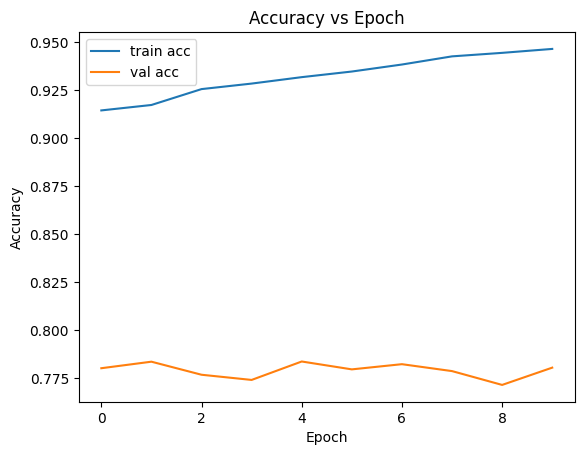

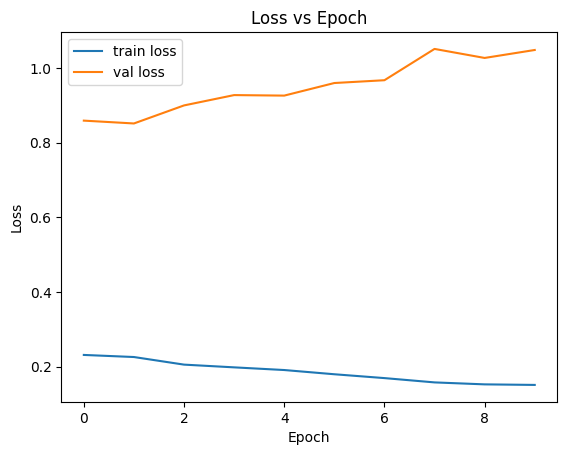

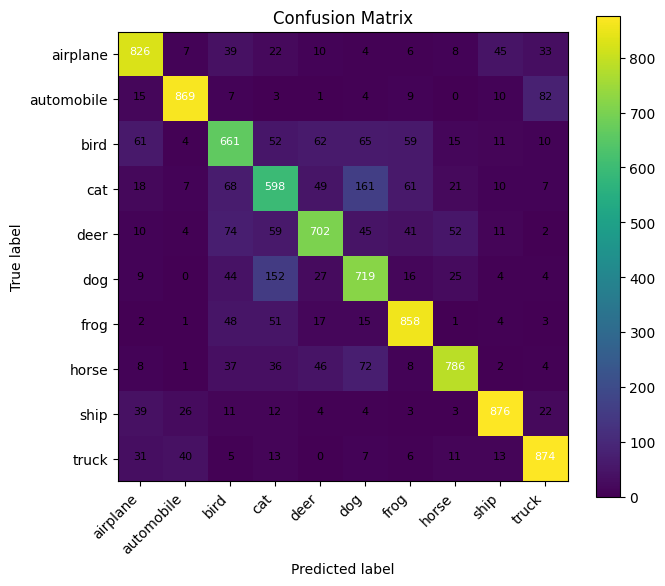

In [ ]:
#Insert Code Here

# 1) Training curves from the last tuner run
hist = best_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=2
)

plt.figure()
plt.plot(hist.history["accuracy"], label="train acc")
plt.plot(hist.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Accuracy vs Epoch"); plt.legend(); plt.show()

plt.figure()
plt.plot(hist.history["loss"], label="train loss")
plt.plot(hist.history["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss vs Epoch"); plt.legend(); plt.show()

# 2) Confusion matrix
cm = confusion_matrix(y_true, y_pred)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.figure(figsize=(7,6))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix"); plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, ha="right"); plt.yticks(tick_marks, classes)

# annotate cells
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], ha="center",
             color="white" if cm[i, j] > thresh else "black", fontsize=8)

plt.ylabel("True label"); plt.xlabel("Predicted label")
plt.tight_layout(); plt.show()


***
***
***

# Part 2: California Housing Dataset - Numerical Based

# The Dataset

In [42]:
# Load the California Housing Prices dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target



# Data Preprocessing

In [43]:
#Insert Code Here
print("X shape:", X.shape, " y shape:", y.shape)

print("Missing values per feature:", np.isnan(X).sum(axis=0))

X shape: (20640, 8)  y shape: (20640,)
Missing values per feature: [0 0 0 0 0 0 0 0]


No missing value

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9999999
)


In [46]:
X_train.max()

np.float64(35682.0)

In [47]:

y_train.max()

np.float64(5.00001)

In [54]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [55]:

X_train.max()

np.float64(35682.0)

In [56]:
print("After scaling:")
print("  Train mean (approx):", X_train_s.mean(axis=0))
print("  Train std  (approx):", X_test_s.std(axis=0))

After scaling:
  Train mean (approx): [-3.95198248e-15  1.96064095e-17 -2.64142915e-15  4.80213986e-15
  7.87231633e-17  5.43264502e-16  2.10542044e-14 -2.84745513e-14]
  Train std  (approx): [1.00121388 0.99975783 0.87995642 0.82587143 0.93143074 0.08305327
 1.00421874 0.99963509]


# Building the ANN Model

In [57]:
#Insert Code Here


model = models.Sequential([
    layers.Input(shape=(X_train_s.shape[1],)),  # 8 features
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="linear")        # regression output
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",                                  # on the (optionally) scaled target
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
             tf.keras.metrics.RootMeanSquaredError(name="rmse")]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, verbose=1),
]

history = model.fit(
    X_train_s, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=callbacks,
    verbose=2
)


Epoch 1/100
207/207 - 8s - 39ms/step - loss: 1.0428 - mae: 0.7004 - rmse: 1.0212 - val_loss: 0.5183 - val_mae: 0.5023 - val_rmse: 0.7199 - learning_rate: 1.0000e-03
Epoch 2/100
207/207 - 1s - 3ms/step - loss: 0.4981 - mae: 0.4969 - rmse: 0.7058 - val_loss: 0.4047 - val_mae: 0.4652 - val_rmse: 0.6362 - learning_rate: 1.0000e-03
Epoch 3/100
207/207 - 1s - 3ms/step - loss: 0.4435 - mae: 0.4727 - rmse: 0.6660 - val_loss: 0.3806 - val_mae: 0.4510 - val_rmse: 0.6169 - learning_rate: 1.0000e-03
Epoch 4/100
207/207 - 1s - 3ms/step - loss: 0.4198 - mae: 0.4591 - rmse: 0.6479 - val_loss: 0.3669 - val_mae: 0.4317 - val_rmse: 0.6057 - learning_rate: 1.0000e-03
Epoch 5/100
207/207 - 1s - 3ms/step - loss: 0.4062 - mae: 0.4489 - rmse: 0.6374 - val_loss: 0.3540 - val_mae: 0.4196 - val_rmse: 0.5950 - learning_rate: 1.0000e-03
Epoch 6/100
207/207 - 1s - 3ms/step - loss: 0.3801 - mae: 0.4357 - rmse: 0.6166 - val_loss: 0.3401 - val_mae: 0.4106 - val_rmse: 0.5832 - learning_rate: 1.0000e-03
Epoch 7/100
207

# Evaluating the Model

In [60]:
y_pred = model.predict(X_test_s, verbose=0).ravel()

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Test MAE : {mae:.3f}")
print(f"Test MSE : {mse:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R2  : {r2:.3f}")

Test MAE : 0.337
Test MSE : 0.244
Test RMSE: 0.494
Test R2  : 0.816


## For the Model Selection Project, you will STOP HERE!
During Units 4, 5, and 6, we will explore and learn additional techniques, and then revisit these projects to apply the below:
- Model evaluation and parameter tuning
- Explanatory visualizations and package your results with data storytelling

# Tuning Model Parameters (Completed in Unit 4)

In [ ]:
#Insert Code Here

# Evaluating the Tuned Model (Completed in Unit 4)

In [ ]:
#Insert Code Here

# Visualizing Results (Completed in Units 4 and 6)

In [ ]:
#Insert Code Here